In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
data=pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 1. Display Top 5 Rows of The Dataset

In [2]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Check Last 5 Rows of The Dataset

In [3]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [4]:
data.shape

(1338, 7)

# 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 5.Check Null Values In The Dataset

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 6. Get Overall Statistics About The Dataset

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 7. Covert Columns From String ['sex' ,'smoker','region' ] To Numerical Values

In [8]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

# 8. Store Feature Matrix In X and Response(Target) In Vector y

In [9]:
X = data.drop('charges', axis=1)
y = data['charges']
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


# 9. Train/Test split¶
1. Split data into two part : a training set and a testing set
2. Train the model(s) on training set
3. Test the Model(s) on Testing set# 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10. Import the models

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



# 11. Model Training

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm=SVR()
svm.fit(X_train, y_train)

rf=RandomForestRegressor()
rf.fit(X_train, y_train)

gr=GradientBoostingRegressor()
gr.fit(X_train, y_train)


GradientBoostingRegressor()

# 12. Prediction on Test Data

In [13]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 =pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred1,'gr':y_pred4})
df1

,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.497618,8924.407244,11001.128629
887,5272.17580,7116.295018,9493.240235,7116.295018,5840.174656
890,29330.98315,36909.013521,9648.305149,36909.013521,28001.980112
1293,9301.89355,9507.874691,9555.219911,9507.874691,9745.291602
259,33750.29180,27013.350008,9421.456253,27013.350008,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.427941,39116.968669,45431.423211
575,12222.89830,11814.555568,9625.054566,11814.555568,12465.025294
535,6067.12675,7638.107736,9504.794628,7638.107736,6974.336525
543,63770.42801,40959.081722,9604.857687,40959.081722,47862.047791


# 13. Compare Performance Visually

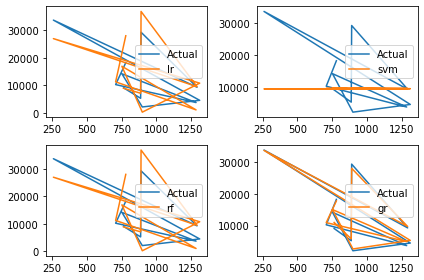

In [14]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label='lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')

plt.tight_layout()
plt.legend()

# 14.  Evaluating the Algorithm R Square model

In [21]:
from sklearn import metrics
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
print(score1,score2,score3,score4)

0.7833463107364538 -0.07230823043884493 0.8644465747931418 0.8779726251291786


# 15. Predict Charges For New Customer

In [15]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}
new_customer = pd.DataFrame(data,index=[0])
print(new_customer)
print()
print()
new_customer_charges_gr= gr.predict(new_customer)
print('Predicted charges for new customer using gr:', new_customer_charges_gr)
new_customer_charges_lr= lr.predict(new_customer)
print('Predicted charges for new customer using lr:', new_customer_charges_lr)
new_customer_charges_svm= svm.predict(new_customer)
print('Predicted charges for new customer using svm:', new_customer_charges_svm)
new_customer_charges_rf= rf.predict(new_customer)
print('Predicted charges for new customer using rf:', new_customer_charges_rf)

   age  sex   bmi  children  smoker  region
0   40    1  40.3         4       1       2


Predicted charges for new customer using gr: [43839.34586293]
Predicted charges for new customer using lr: [36654.46199676]
Predicted charges for new customer using svm: [9524.72532718]
Predicted charges for new customer using rf: [43559.6449111]


# SAVE MODEL USING JOBLIB

In [19]:
gr = GradientBoostingRegressor() 
gr.fit(X, y)
y



0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [20]:
import joblib

joblib.dump(gr,'model_joblib_gr')
model=joblib.load('model_joblib_gr')
model.predict(new_customer)

array([42148.361888])

# GUI

In [25]:
from tkinter import*
import tkinter as tk
from tkinter import ttk
import joblib

In [28]:
def show_entry():

    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    model=joblib.load('model_joblib_gr')
    result=model.predict([[p1,p2,p3,p4,p5,p6]])

    Label(master, text="Insurance Cost").grid(row=7)
    Label(master, text=result).grid(row=8)
 


master=Tk()
master.title("Insurance Cost Prediction")
label=Label(master,text="Insurance Cost Prediction",bg="black",fg="white").grid(row=0,columnspan=2)

Label(master,text="Enter your age").grid(row=1)
Label(master,text="MALE OR FEMALE [1/0]").grid(row=2)
Label(master,text="Enter your BMI values").grid(row=3)
Label(master,text="Enter Number of Children").grid(row=4)
Label(master,text="Smoker Yes/No [1/0]").grid(row=5)
Label(master,text="Region [1-4]").grid(row=6)


e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)



e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

master.geometry("300x250")


 


Button(master,text="Predict",command=show_entry).grid()             

master.mainloop()
